Dataset Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Dataset Shape: (569, 30)

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      

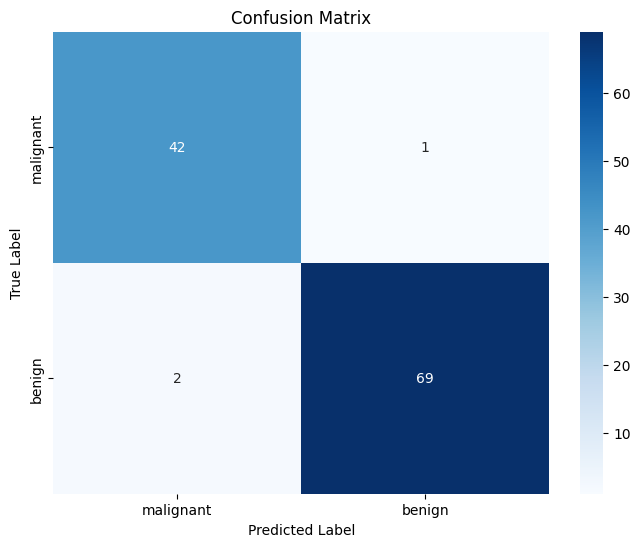

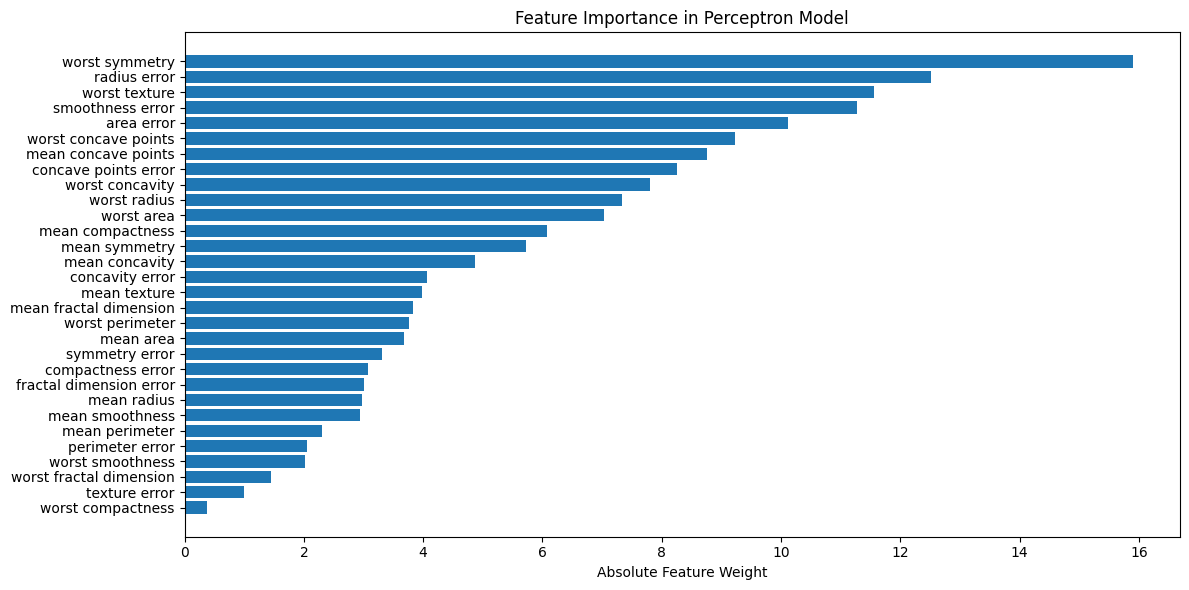

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print basic information about the dataset
print("Dataset Features:", data.feature_names)
print("Target Names:", data.target_names)
print("Dataset Shape:", X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Perceptron model
perceptron = Perceptron(max_iter=100, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred = perceptron.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot feature importance (using absolute values of coefficients)
plt.figure(figsize=(12, 6))
feature_importance = np.abs(perceptron.coef_[0])
feature_names = data.feature_names

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Absolute Feature Weight')
plt.title('Feature Importance in Perceptron Model')
plt.tight_layout()
plt.show()